TASK 4 - SENTIMENT ANALYSIS

1. Data Cleaning & Preprocessing

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

df = pd.read_csv("twitter_sentiment.csv")

df.dropna(subset=["clean_text", "category"], inplace=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    try:
        text = str(text).lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
        text = re.sub(r"[^a-z\s]", '', text)  # remove punctuation & numbers
        tokens = nltk.word_tokenize(text)  # tokenize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return " ".join(tokens)
    except Exception as e:
        print(f"Error processing: {text} -> {e}")
        return ""

df["processed_text"] = df["clean_text"].apply(preprocess_text)

df[["clean_text", "processed_text", "category"]].head()


,clean_text,processed_text,category
0,when modi promised “minimum government maximum...,modi promised minimum government maximum gover...,-1.0
1,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi,0.0
2,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...,1.0
3,asking his supporters prefix chowkidar their n...,asking supporter prefix chowkidar name modi gr...,1.0
4,answer who among these the most powerful world...,answer among powerful world leader today trump...,1.0


2. EDA

C:\Users\sonak\AppData\Local\Temp\ipykernel_6032\2014092071.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='Set2')


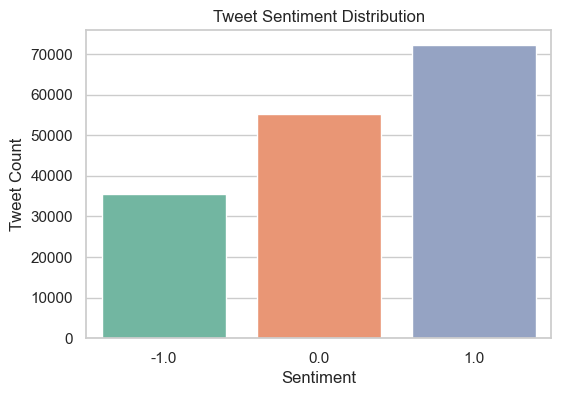

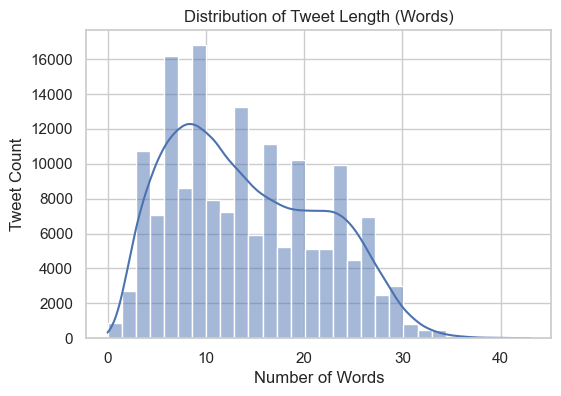

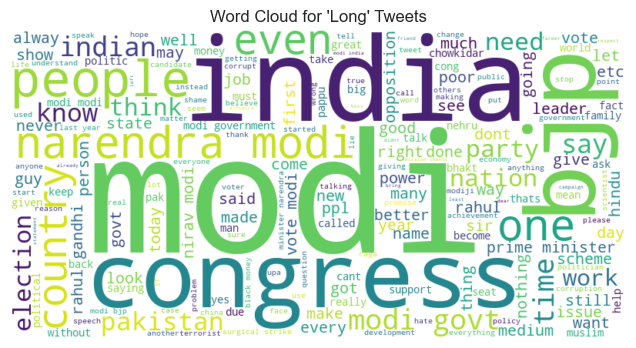

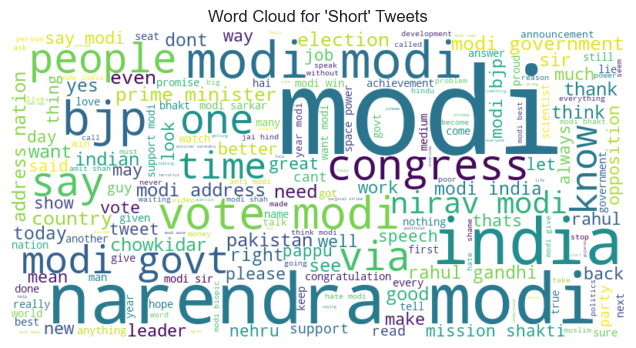

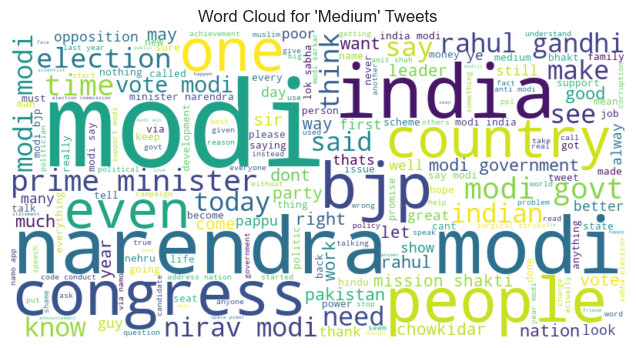

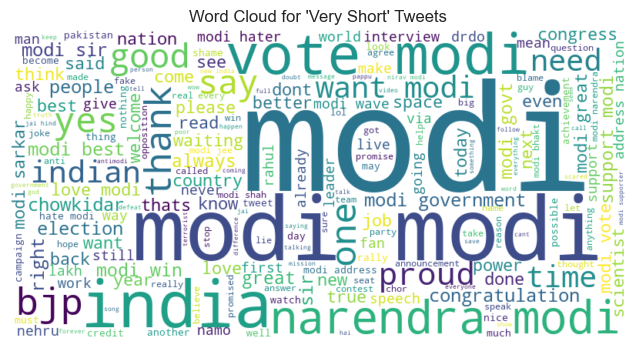

In [5]:
#1: Import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set style
sns.set(style="whitegrid")

#2: Class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='category', palette='Set2')
plt.title("Tweet Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

#3: Tweet length distribution
df["text_length"] = df["processed_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
sns.histplot(df["text_length"], bins=30, kde=True)
plt.title("Distribution of Tweet Length (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Tweet Count")
plt.show()

# 4. WordCloud
def bucket_length(length):
    if length < 5:
        return "Very Short"
    elif length < 10:
        return "Short"
    elif length < 20:
        return "Medium"
    else:
        return "Long"

df["length_bucket"] = df["text_length"].apply(bucket_length)

for bucket in df["length_bucket"].unique():
    text = " ".join(df[df["length_bucket"] == bucket]["processed_text"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{bucket}' Tweets")
    plt.show()
